In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calibrate_accel(accel_list_raw, t_list):
    index = next(x for x, val in enumerate(t_list) if val>5) # use first 5 secs to calibrate
    calibration_a = sum(ax_list_raw[:index])/index
    accel_list = accel_list_raw - calibration_a
    return accel_list

def filt_accel(accel_list, k=0.95):
    accel_list_filtered = accel_list.copy()
    for index in range(len(accel_list)):
        if index > 0: 
            accel_list_filtered[index] = k * accel_list_filtered[index-1] + (1.-k) * accel_list[index]
    return accel_list_filtered
            
def get_1dtraj(accel_list, t_interval_list):
    v_list = [0]
    for index in range(len(accel_list)):
        if index>0:
            v = t_interval_list[index]*accel_list[index]+v_list[index-1]
            v_list.append(v)
    v_list = np.array(v_list)
    x_list = [0]
    for index in range(len(accel_list)):
        if index>0:
            x = (t_interval_list[index]**2)*accel_list[index]/2+v_list[index]*t_interval_list[index]+x_list[index-1]
            x_list.append(x)
    x_list = np.array(x_list)
    return v_list, x_list

In [3]:
my_data = np.genfromtxt('./accelX30cm.csv',delimiter=',')

t_interval_list = my_data[:,0]
ax_list_raw = my_data[:,1]

t_list = []
for index, t_interval in enumerate(t_interval_list):
    t_list.append(sum(t_interval_list[:index]))
t_list = np.array(t_list)

In [4]:
ax_list_unf = calibrate_accel(ax_list_raw, t_list)
vx_list_unf, x_list_unf = get_1dtraj(ax_list_unf, t_interval_list)

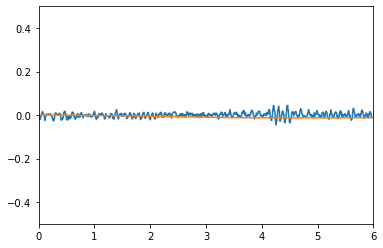

In [5]:
plt.plot(t_list, ax_list_unf)
plt.plot(t_list, x_list_unf)
plt.xlim((0,6))
plt.ylim((-.5, .5))
plt.show()

In [21]:
ax_list_ = filt_accel(ax_list_raw, 0.5)
ax_list = calibrate_accel(ax_list_, t_list)
vx_list, x_list = get_1dtraj(ax_list, t_interval_list)

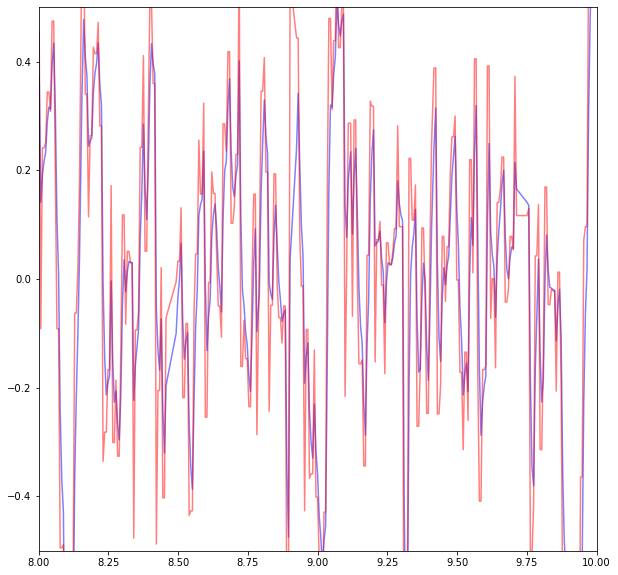

In [22]:
plt.figure(figsize=(10,10))
plt.plot(t_list, ax_list, alpha=.5, color='b')
plt.plot(t_list, ax_list_unf, alpha=.5, color='r')
plt.xlim((8,10))
plt.ylim((-.5, .5))
plt.show()

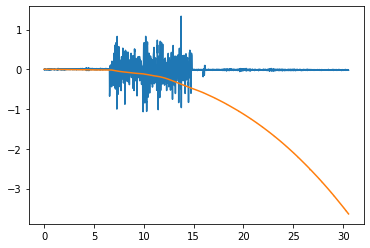

In [23]:
plt.plot(t_list, ax_list)
plt.plot(t_list, x_list)
plt.show()

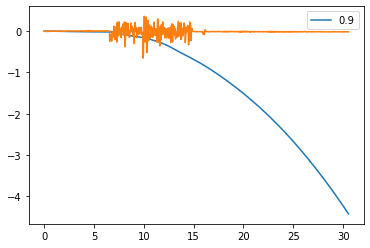

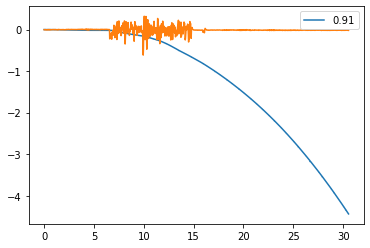

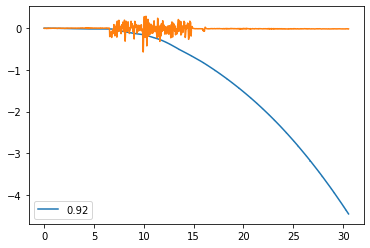

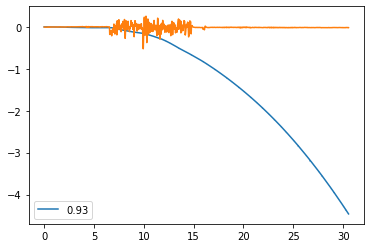

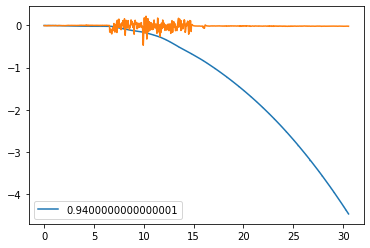

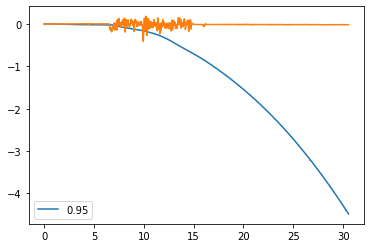

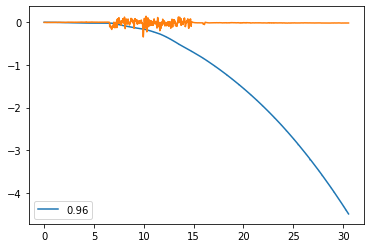

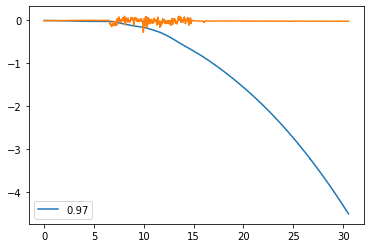

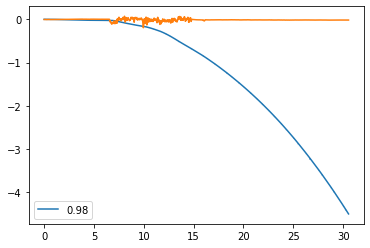

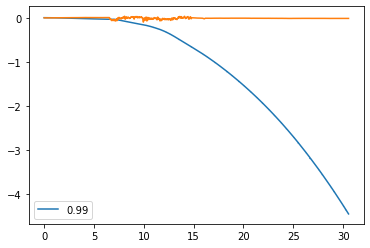

In [20]:
for k in np.linspace(.9, .99, 10):
    ax_list_test = filt_accel(ax_list_unf, k)
    vx_list_test, x_list_test = get_1dtraj(ax_list_test, t_interval_list)
    plt.plot(t_list, x_list_test, label=(k))
    plt.plot(t_list, ax_list_test)
#     plt.xlim((0,6))
#     plt.ylim((-.5, .5))
    plt.legend()
    plt.show()